In [6]:
import os
from IPython.display import display, Image

In [4]:
os.chdir('/Users/sma/Documents/INRAE internship/correspondence/second_tex')

# Understanding the Metrics
### We use two packages: NLTK Vader, and Patterns
Both of these use lexical approach, which means they have a large dictionary of words with scores.

NLTK claims to have trained on social media data (which is more relevant to us)

Pattern claims to have trained on some other publicly available data, not social media but some books.

## NLTK Vader Sentiment Analysis
https://www.nltk.org/howto/sentiment.html


* calculate sentiment for each post
* save it into dataframe.

The VADER algorithm outputs sentiment scores to 4 classes of sentiments https://github.com/nltk/nltk/blob/develop/nltk/sentiment/vader.py#L441:

* neg, neu, pos - ratios for proportions of text that fall in each category (negative, neutral, positive)
    * neg + neu + pos = 1
    * in [0,1]
    * IMPORTANTLY: these proportions represent the "raw categorization" of each lexical item (e.g., words, emoticons/emojis, or initialisms) into positve, negative, or neutral classes; they do not account for the VADER rule-based enhancements such as word-order sensitivity for sentiment-laden multi-word phrases, degree modifiers, word-shape amplifiers, punctuation amplifiers, negation polarity switches, or contrastive conjunction sensitivity.
* compound - composite score, with added VADER weightings and rules, and normalized
    * in [-1,1]

more details: https://github.com/cjhutto/vaderSentiment#about-the-scoring

## Patterns Measures
https://github.com/clips/pattern/wiki/pattern-en#sentiment
https://github.com/clips/pattern/wiki/pattern-en#mood--modality

* Sentiment - from -1 to 1 - (bad or good)
* Subjectivity - from 0 to 1 - (objective or subjective)
* Modality - from -1 to 1 - (unsure or sure)

mood simply has a grammar detection system and returns the first mood signalled by grammar that is detected in a sentence.

modality - "Epistemic modality" is used to express possibility (i.e. how truthful is what is being said).

 The modality() function was tested with BioScope and Wikipedia training data from CoNLL2010 Shared Task 1.
 See for example Morante, R., Van Asch, V., Daelemans, W. (2010):
 Memory-Based Resolution of In-Sentence Scopes of Hedge Cues
 http://www.aclweb.org/anthology/W/W10/W10-3006.pdf
 Sentences in the training corpus are labelled as "certain" or "uncertain".
 For Wikipedia sentences, 2000 "certain" and 2000 "uncertain":
 modality(sentence) > 0.5 => A 0.70 P 0.73 R 0.64 F1 0.68

### Checking out the Results
We can check the relationship between our sentiment metrics and make sure they make sense. 

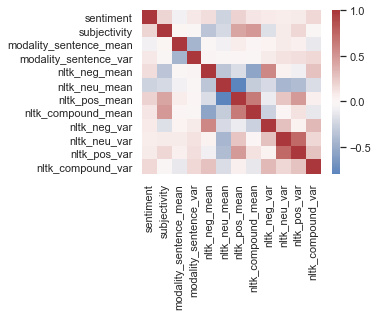

In [9]:
Image('correlation_between_metrics.png')

Negative correlations between nltk pos, neu, neg is expected since sum(...) = 1

Correlations with nltk compound reveal the relationship after VADER rules are applied.

Pattern sentiment and ntlk compound are positively correlated which is good, these two scores generally agree.

Subjectivity and Modality are not highly correlated with either, overall. But subjectivity has small (~0.25) negative correlation with neutrality. This is quite intuitive as posts with less strongly indicative words will have more neutral sentiment as well as register a more objective

# Main Results (Plots, Paired T-Test, F-Test, Regression)
* all tests are at the 5% level

### F-Tests:
Main thing: F-Test compares whether two sets of data have the same variance

Let x1, x2, . . . , xn and y1, y2, . . . , ym be independent random samples from normal distributions with means μX and μY and standard deviations σX and σY , respectively.

a. To test H0: $σ_X^2 = σ_Y^2$ versus H1: $σ_X^2 > σ_Y^2$ at the α level of significance, reject H0 if $s_Y^2/s_X^2 \leq F_{α,m−1,n−1} $.


b. To test H0: $σ_X^2 = σ_Y^2$ versus H1: $σ_X^2 < σ_Y^2$ at the α level of significance, reject H0 if
$s_Y^2/s_X^2 \geq F_{1−α,m−1,n−1} $.

c. To test H0: $σ_X^2 = σ_Y^2$ versus H1: $σ_X^2 ̸= σ_Y^2$ at the α level of significance, reject H0 if
$s_Y^2 /s_X^2$ is either 

* $\leq F_{α/2,m−1,n−1}$
* $\geq F_{1−α/2,m−1,n−1} $.

alternate version of c: we instead take max of sY/sX or sX/sY, and then check that its <= F_

### Paired T-Test
We exploit threads to do paired t-test for posts mentioning a hazard vs posts NOT mentioning a hazard (matched-pairs sample)

We pair by taking the average senitment for NA posts in a thread vs hazard-cointaining posts within a thread.

Main weakness: if threads are mainly ABOUT that hazard and NA posts just don't mention it specifically by name while still being in the context of it, then the signifance will be __underestimated__. If a hazard is mentioned once, off-topic, in a thread of a different topic then the significance of the result may be __overestimated__.

__To improve on this model it would be good to:__
* __1) Develop a metric to ensure the main topic of a thread (topic mining on titles, variance of term counts in thread..?)__
* __2) Calculate an Independent T-Test where we have a random sampling from all threads vs our selected subset. (however our entire scrape still has its own sample bias, but I do believe the entire thing is a quite noisy sample)__
* __3) Possibly correct specification of degrees of freedom, since these samples are means of other samples which means the sample size is actually larger.__


TODO: independent T-Tests on thread-averages, comparing NA-only threads vs hazard-containing threads. 
I want to select only threads where a hazard is mentioned in the title/more than once/etc but 1) kind of p-hacky and 2) sounds like it will limite data a LOT!

Note that for the T-Test I have highlighte in green the significant results

Sample sizes for these T-Tests:

* 'related terms': 167,
* 'other bacteria': 160,
* 'microbiologic contaminants': 92,
* 'food preservatives, sweeteners and additives': 64,
* 'listeria': 33,
* 'salmonella': 23,
* 'pesticides': 16,
* 'histamine': 13,
* 'parasites': 8,
* 'gmo': 7,
* 'endocrine disruptor': 7,
* 'campylobacter': 6,
* 'bisphenol a': 6,
* 'metals': 3,
* 'ecoli': 3,
* 'nitrates': 2,
* 'phthalates': 1,
* 'don': 1,
* 'cronobacter': 1}

## Pattern Sentiment

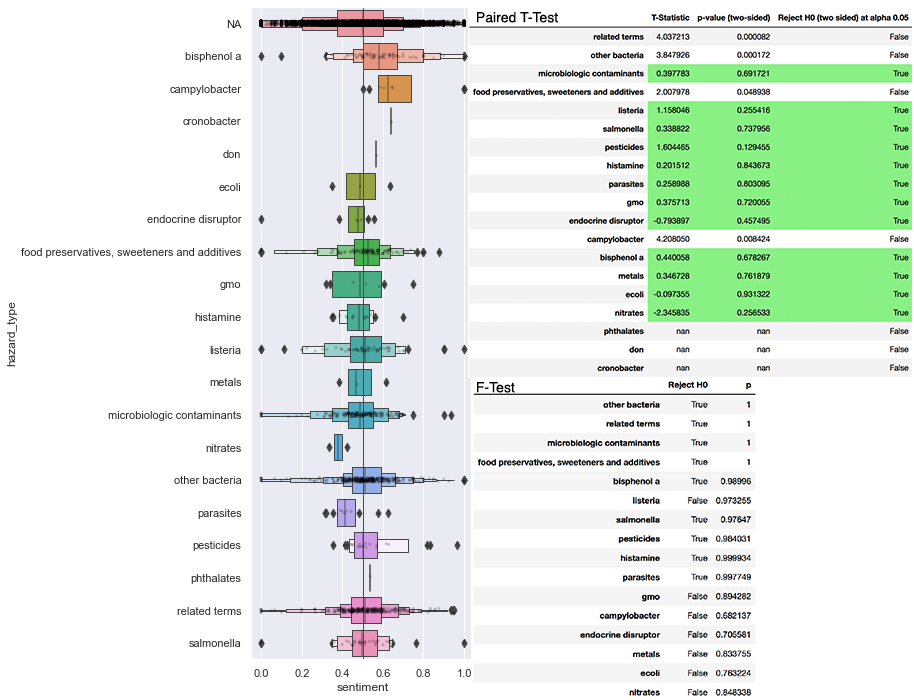

In [7]:
Image('sentiment.png')

It may seem strange that these terms have positive sentiment. Keep in mind that we are looking at the sentiment in the entire post where the term occurs, and people are netmums are quite often very friendly to each other when replying.

The red line is the 50% quantile of NA so we can compare against that as a baseline.

## NLTK Sentiment (compound)

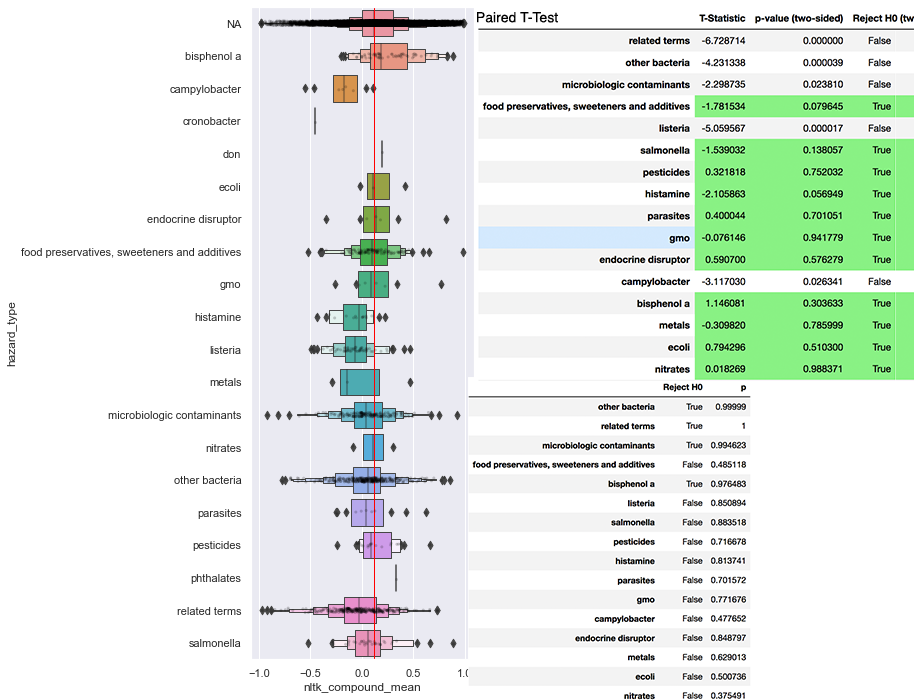

In [10]:
Image('nltk_compound_mean.png')

## Modality

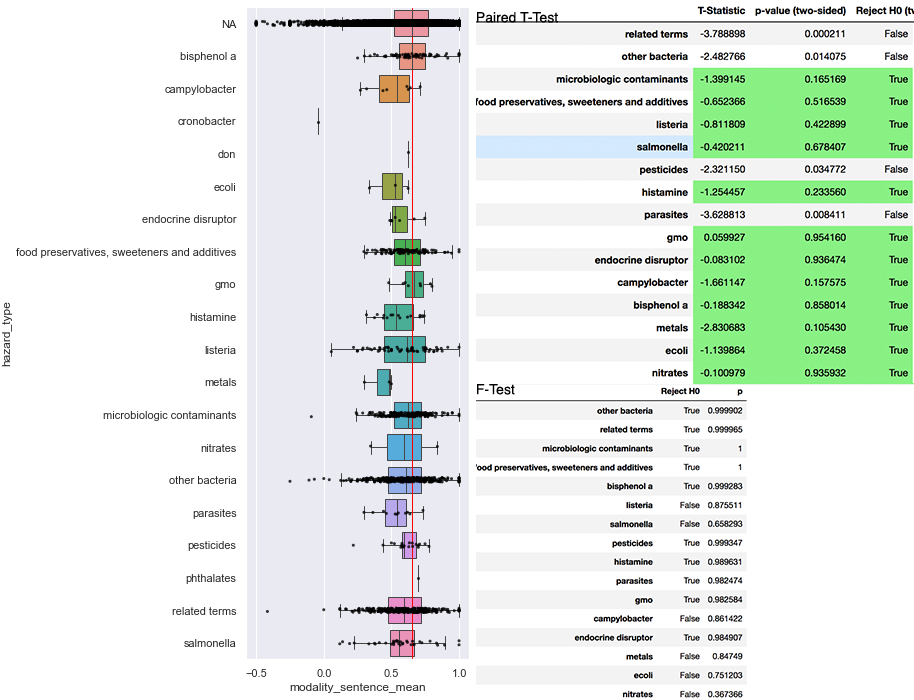

In [11]:
Image('modality.png')

We can see that compared to posts without hazard terms (NA), posts with hazards mentioned tend to have lower confidence in what they are saying.

note: data for DON is extremely small. It is only one observation which by checking manually, I can confirm is not relevant (it is a typo of don't )
Cronobacter is also only one observation.

## Subjectivity

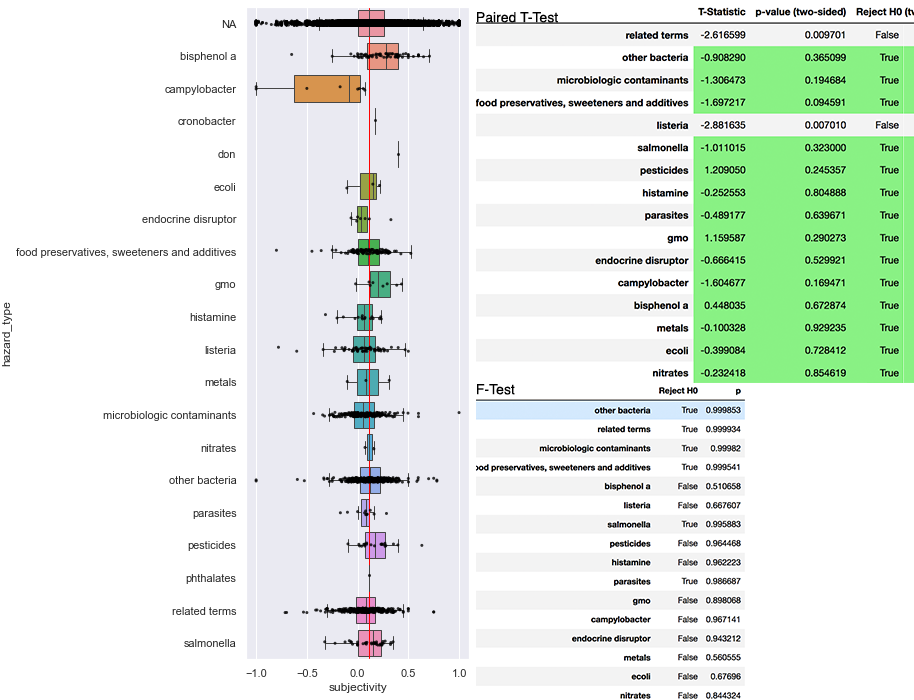

In [12]:
Image('subjectivity.png')

## Regressions
* why do regression when we already did a T-Test? 
    * these regressions rely on the fact that some posts mention a hazard multiple times. The T-Tests are done based on categorical data.


* 1) simple models e.g. sentiment ~ X where X is a matrix of all hazard-occurence counts
* 2) interaction model e.g. 'sentiment ~ X : hazard_type' (in R pseudo-code)

The simple model is easier to interpret and has higher significance. We also remove NA in this model because it adds noise to the data (due to unobserved: ther are many other topics which can influence sentiment). In the interaction model NA is one of the categories so we don't worry about this.

The interaction model could be useful to see if there are unique relationships between certain terms in a specific context. e.g. if posts classified as 'salmonella' have a positive relationship between 'additives', and others do not.

### Pattern Sentiment

In [ ]:
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sentiment   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.697
Date:                Tue, 20 Jul 2021   Prob (F-statistic):             0.0256
Time:                        13:42:49   Log-Likelihood:                 516.42
No. Observations:                1180   AIC:                            -988.8
Df Residuals:                    1158   BIC:                            -877.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.5038      0.008     61.094      0.000       0.488       0.520
chemical contaminants                        -8.542e-17   3.81e-17     -2.242      0.025    -1.6e-16   -1.07e-17
endocrine disruptor                             -0.0741      0.051     -1.465      0.143      -0.173       0.025
food preservatives, sweeteners and additives     0.0034      0.012      0.292      0.770      -0.020       0.027
pesticides                                       0.0564      0.027      2.105      0.035       0.004       0.109
veterinary drugs                              5.027e-18   7.26e-17      0.069      0.945   -1.37e-16    1.48e-16
gmo                                             -0.0220      0.053     -0.413      0.680      -0.126       0.082
metals                                          -0.0157      0.066     -0.240      0.810      -0.144       0.113
mycotoxin                                    -5.795e-17    6.5e-17     -0.891      0.373   -1.86e-16    6.96e-17
bisphenol a                                      0.0271      0.008      3.468      0.001       0.012       0.042
furan                                        -2.265e-17   4.46e-17     -0.508      0.612    -1.1e-16    6.49e-17
don                                              0.0629      0.158      0.398      0.691      -0.247       0.373
dioxin and pcb                                  -0.0402      0.081     -0.498      0.619      -0.198       0.118
mosh and moah                                -2.165e-17   3.16e-17     -0.685      0.494   -8.37e-17    4.04e-17
nitrates                                        -0.0772      0.085     -0.904      0.366      -0.245       0.090
acrylamid                                    -2.658e-17   2.52e-17     -1.056      0.291    -7.6e-17    2.28e-17
phthalates                                      -0.0129      0.074     -0.174      0.862      -0.159       0.133
microbiologic contaminants                      -0.0168      0.011     -1.474      0.141      -0.039       0.006
salmonella                                      -0.0163      0.021     -0.769      0.442      -0.058       0.025
campylobacter                                    0.0885      0.034      2.600      0.009       0.022       0.155
listeria                                         0.0019      0.013      0.145      0.884      -0.024       0.028
ecoli                                            0.0299      0.079      0.378      0.705      -0.125       0.185
cronobacter                                      0.1334      0.158      0.845      0.398      -0.176       0.443
histamine                                       -0.0083      0.020     -0.423      0.672      -0.047       0.030
other bacteria                                   0.0045      0.006      0.742      0.458      -0.007       0.016
virus                                            0.0001      0.016      0.007      0.995      -0.030       0.031
parasites                                       -0.0076      0.009     -0.803      0.422      -0.026       0.011
related terms                                    0.0098      0.008      1.281      0.200      -0.005       0.025
==============================================================================
Omnibus:                      124.478   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              367.890
Skew:                          -0.534   Prob(JB):                     1.30e-80
Kurtosis:                       5.518   Cond. No.                     1.25e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.

### NLTK Sentiment (compound)

In [ ]:
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     nltk_compound_mean   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     5.126
Date:                Tue, 20 Jul 2021   Prob (F-statistic):           6.17e-13
Time:                        13:42:49   Log-Likelihood:                -87.598
No. Observations:                1180   AIC:                             219.2
Df Residuals:                    1158   BIC:                             330.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.0681      0.014      4.950      0.000       0.041       0.095
chemical contaminants                        -9.867e-17   6.36e-17     -1.552      0.121   -2.23e-16     2.6e-17
endocrine disruptor                              0.0984      0.084      1.167      0.244      -0.067       0.264
food preservatives, sweeteners and additives     0.0330      0.020      1.677      0.094      -0.006       0.072
pesticides                                       0.0488      0.045      1.092      0.275      -0.039       0.136
veterinary drugs                              4.734e-17   1.21e-16      0.391      0.696    -1.9e-16    2.85e-16
gmo                                              0.0677      0.089      0.762      0.446      -0.106       0.242
metals                                           0.0369      0.109      0.338      0.735      -0.178       0.251
mycotoxin                                     1.738e-16   1.08e-16      1.601      0.110   -3.91e-17    3.87e-16
bisphenol a                                      0.0534      0.013      4.098      0.000       0.028       0.079
furan                                        -5.806e-17   7.44e-17     -0.780      0.436   -2.04e-16     8.8e-17
don                                              0.1307      0.263      0.496      0.620      -0.386       0.648
dioxin and pcb                                   0.1511      0.135      1.123      0.262      -0.113       0.415
mosh and moah                                  1.02e-16   5.27e-17      1.934      0.053   -1.46e-18    2.06e-16
nitrates                                         0.0778      0.142      0.546      0.585      -0.202       0.357
acrylamid                                     6.258e-17    4.2e-17      1.490      0.137   -1.98e-17    1.45e-16
phthalates                                       0.2872      0.124      2.317      0.021       0.044       0.530
microbiologic contaminants                       0.0267      0.019      1.410      0.159      -0.010       0.064
salmonella                                       0.0537      0.035      1.518      0.129      -0.016       0.123
campylobacter                                   -0.1058      0.057     -1.863      0.063      -0.217       0.006
listeria                                        -0.0604      0.022     -2.768      0.006      -0.103      -0.018
ecoli                                            0.0624      0.132      0.472      0.637      -0.197       0.322
cronobacter                                     -0.5177      0.263     -1.966      0.050      -1.034      -0.001
histamine                                       -0.0496      0.033     -1.508      0.132      -0.114       0.015
other bacteria                                  -0.0087      0.010     -0.868      0.386      -0.028       0.011
virus                                           -0.0734      0.026     -2.826      0.005      -0.124      -0.022
parasites                                        0.0023      0.016      0.147      0.883      -0.029       0.033
related terms                                   -0.0843      0.013     -6.596      0.000      -0.109      -0.059
==============================================================================
Omnibus:                       35.395   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.451
Skew:                          -0.148   Prob(JB):                     6.81e-17
Kurtosis:                       4.194   Cond. No.                     1.25e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.

Significance at 5% level: 

* Positive: Bisphenol A, Pthalates
* Negative : Listeria, Cronobacter, Virus, Related Terms

### Subjectivity

In [ ]:
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           subjectivity   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     3.141
Date:                Tue, 20 Jul 2021   Prob (F-statistic):           2.45e-06
Time:                        13:42:49   Log-Likelihood:                 264.86
No. Observations:                1180   AIC:                            -485.7
Df Residuals:                    1158   BIC:                            -374.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.1039      0.010     10.185      0.000       0.084       0.124
chemical contaminants                        -1.028e-16   4.71e-17     -2.180      0.029   -1.95e-16   -1.03e-17
endocrine disruptor                             -0.0112      0.063     -0.179      0.858      -0.134       0.112
food preservatives, sweeteners and additives     0.0008      0.015      0.052      0.959      -0.028       0.029
pesticides                                       0.0537      0.033      1.621      0.105      -0.011       0.119
veterinary drugs                              9.107e-17   8.99e-17      1.013      0.311   -8.53e-17    2.67e-16
gmo                                              0.0922      0.066      1.401      0.162      -0.037       0.221
metals                                          -0.0292      0.081     -0.361      0.718      -0.188       0.130
mycotoxin                                    -4.164e-17   8.05e-17     -0.517      0.605      -2e-16    1.16e-16
bisphenol a                                      0.0346      0.010      3.576      0.000       0.016       0.054
furan                                        -8.444e-17   5.52e-17     -1.529      0.126   -1.93e-16    2.39e-17
don                                              0.2894      0.195      1.481      0.139      -0.094       0.673
dioxin and pcb                                   0.0688      0.100      0.689      0.491      -0.127       0.265
mosh and moah                                 3.717e-17   3.91e-17      0.950      0.342   -3.96e-17    1.14e-16
nitrates                                         0.0268      0.106      0.253      0.800      -0.181       0.234
acrylamid                                    -1.767e-17   3.12e-17     -0.567      0.571   -7.88e-17    4.35e-17
phthalates                                       0.0456      0.092      0.496      0.620      -0.135       0.226
microbiologic contaminants                      -0.0090      0.014     -0.637      0.524      -0.037       0.019
salmonella                                       0.0290      0.026      1.106      0.269      -0.022       0.080
campylobacter                                   -0.2099      0.042     -4.983      0.000      -0.293      -0.127
listeria                                        -0.0190      0.016     -1.173      0.241      -0.051       0.013
ecoli                                           -0.0664      0.098     -0.678      0.498      -0.259       0.126
cronobacter                                      0.0577      0.195      0.296      0.768      -0.326       0.441
histamine                                       -0.0164      0.024     -0.672      0.502      -0.064       0.031
other bacteria                                   0.0092      0.007      1.232      0.218      -0.005       0.024
virus                                           -0.0144      0.019     -0.747      0.455      -0.052       0.023
parasites                                       -0.0037      0.012     -0.314      0.754      -0.027       0.019
related terms                                   -0.0246      0.009     -2.594      0.010      -0.043      -0.006
==============================================================================
Omnibus:                      177.898   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              960.086
Skew:                          -0.574   Prob(JB):                    3.31e-209
Kurtosis:                       7.267   Cond. No.                     1.25e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.


Significance at 5% level: 

* Positive: Bisphenol A
* Negative : chemical contaminants, campylobacter, related terms

### Modality 

In [ ]:
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     modality_sentence_mean   R-squared:                       0.031
Model:                                OLS   Adj. R-squared:                  0.013
Method:                     Least Squares   F-statistic:                     1.767
Date:                    Tue, 20 Jul 2021   Prob (F-statistic):             0.0176
Time:                            13:42:49   Log-Likelihood:                 376.73
No. Observations:                    1180   AIC:                            -709.5
Df Residuals:                        1158   BIC:                            -597.9
Df Model:                              21                                         
Covariance Type:                nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.5900      0.009     63.558      0.000       0.572       0.608
chemical contaminants                        -1.394e-16   4.29e-17     -3.252      0.001   -2.24e-16   -5.53e-17
endocrine disruptor                              0.0026      0.057      0.045      0.964      -0.109       0.114
food preservatives, sweeteners and additives     0.0085      0.013      0.643      0.520      -0.017       0.035
pesticides                                       0.0299      0.030      0.990      0.322      -0.029       0.089
veterinary drugs                              1.285e-18   8.18e-17      0.016      0.987   -1.59e-16    1.62e-16
gmo                                              0.0799      0.060      1.334      0.183      -0.038       0.197
metals                                          -0.0552      0.074     -0.748      0.455      -0.200       0.090
mycotoxin                                     2.245e-16   7.32e-17      3.067      0.002    8.09e-17    3.68e-16
bisphenol a                                      0.0279      0.009      3.168      0.002       0.011       0.045
furan                                        -1.707e-18   5.02e-17     -0.034      0.973      -1e-16    9.68e-17
don                                              0.0350      0.178      0.197      0.844      -0.314       0.384
dioxin and pcb                                   0.0662      0.091      0.729      0.466      -0.112       0.244
mosh and moah                                 1.044e-16   3.56e-17      2.935      0.003    3.46e-17    1.74e-16
nitrates                                         0.0033      0.096      0.034      0.973      -0.185       0.192
acrylamid                                     9.518e-17   2.83e-17      3.358      0.001    3.96e-17    1.51e-16
phthalates                                      -0.0032      0.084     -0.038      0.970      -0.167       0.161
microbiologic contaminants                       0.0295      0.013      2.305      0.021       0.004       0.055
salmonella                                      -0.0126      0.024     -0.528      0.598      -0.059       0.034
campylobacter                                   -0.0580      0.038     -1.514      0.130      -0.133       0.017
listeria                                        -0.0063      0.015     -0.425      0.671      -0.035       0.023
ecoli                                           -0.0512      0.089     -0.574      0.566      -0.226       0.124
cronobacter                                     -0.6340      0.178     -3.569      0.000      -0.983      -0.285
histamine                                       -0.0117      0.022     -0.529      0.597      -0.055       0.032
other bacteria                                   0.0024      0.007      0.352      0.725      -0.011       0.016
virus                                           -0.0327      0.018     -1.868      0.062      -0.067       0.002
parasites                                       -0.0026      0.011     -0.246      0.806      -0.023       0.018
related terms                                -9.182e-06      0.009     -0.001      0.999      -0.017       0.017
==============================================================================
Omnibus:                       85.918   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.188
Skew:                          -0.454   Prob(JB):                     1.01e-40
Kurtosis:                       4.710   Cond. No.                     1.25e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.


Significance at 5% level: 

* Positive: mycotoxin, bisphenol a, mosh and moah, acrylamid, microbiologic contaminants
* Negative : chemical contaminants, cronobacter

### Interaction Regression
* apologies that it is so long

In [ ]:
sentiment ~ (chemical_contaminants + endocrine_disruptor + food_preservatives_sweeteners_and_additives + pesticides + veterinary_drugs + gmo + metals + mycotoxin + bisphenol_a + furan + don + dioxin_and_pcb + mosh_and_moah + nitrates + acrylamid + phthalates + microbiologic_contaminants + salmonella + campylobacter + listeria + ecoli + cronobacter + histamine + other_bacteria + virus + parasites + related_terms + sentiment) : hazard_type
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sentiment   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.542e+30
Date:                Tue, 20 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:42:46   Log-Likelihood:             6.4735e+05
No. Observations:               19671   AIC:                        -1.295e+06
Df Residuals:                   19588   BIC:                        -1.294e+06
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================================================
                                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                              6.993e-16   2.11e-17     33.102      0.000    6.58e-16    7.41e-16
chemical_contaminants:hazard_type[NA]                                                                 -1.951e-17   1.12e-29  -1.74e+12      0.000   -1.95e-17   -1.95e-17
chemical_contaminants:hazard_type[bisphenol a]                                                         1.423e-15    8.4e-30   1.69e+14      0.000    1.42e-15    1.42e-15
chemical_contaminants:hazard_type[campylobacter]                                                       1.116e-15   7.05e-30   1.58e+14      0.000    1.12e-15    1.12e-15
chemical_contaminants:hazard_type[cronobacter]                                                        -9.627e-17   6.32e-30  -1.52e+13      0.000   -9.63e-17   -9.63e-17
chemical_contaminants:hazard_type[don]                                                                 8.824e-16   9.46e-30   9.33e+13      0.000    8.82e-16    8.82e-16
chemical_contaminants:hazard_type[ecoli]                                                              -1.933e-15   8.28e-30  -2.34e+14      0.000   -1.93e-15   -1.93e-15
chemical_contaminants:hazard_type[endocrine disruptor]                                                 -3.69e-15   3.86e-30  -9.55e+14      0.000   -3.69e-15   -3.69e-15
chemical_contaminants:hazard_type[food preservatives, sweeteners and additives]                       -9.809e-16   4.79e-30  -2.05e+14      0.000   -9.81e-16   -9.81e-16
chemical_contaminants:hazard_type[gmo]                                                                 1.739e-15   8.44e-30   2.06e+14      0.000    1.74e-15    1.74e-15
chemical_contaminants:hazard_type[histamine]                                                           1.683e-15   5.63e-30   2.99e+14      0.000    1.68e-15    1.68e-15
chemical_contaminants:hazard_type[listeria]                                                           -3.507e-17   7.08e-30  -4.95e+12      0.000   -3.51e-17   -3.51e-17
chemical_contaminants:hazard_type[metals]                                                             -7.419e-16   7.02e-30  -1.06e+14      0.000   -7.42e-16   -7.42e-16
chemical_contaminants:hazard_type[microbiologic contaminants]                                          5.102e-16   4.24e-30    1.2e+14      0.000     5.1e-16     5.1e-16
chemical_contaminants:hazard_type[nitrates]                                                            5.927e-16   2.01e-30   2.95e+14      0.000    5.93e-16    5.93e-16
chemical_contaminants:hazard_type[other bacteria]                                                     -7.123e-16   3.54e-30  -2.01e+14      0.000   -7.12e-16   -7.12e-16
chemical_contaminants:hazard_type[parasites]                                                           3.713e-16   4.35e-30   8.53e+13      0.000    3.71e-16    3.71e-16
chemical_contaminants:hazard_type[pesticides]                                                         -2.531e-16   4.65e-30  -5.44e+13      0.000   -2.53e-16   -2.53e-16
chemical_contaminants:hazard_type[phthalates]                                                          5.024e-16   2.96e-30   1.69e+14      0.000    5.02e-16    5.02e-16
chemical_contaminants:hazard_type[related terms]                                                      -9.529e-16   5.59e-30  -1.71e+14      0.000   -9.53e-16   -9.53e-16
chemical_contaminants:hazard_type[salmonella]                                                         -1.893e-16   6.65e-30  -2.84e+13      0.000   -1.89e-16   -1.89e-16
endocrine_disruptor:hazard_type[NA]                                                                    4.128e-16      4e-30   1.03e+14      0.000    4.13e-16    4.13e-16
endocrine_disruptor:hazard_type[bisphenol a]                                                          -5.717e-16   6.81e-30   -8.4e+13      0.000   -5.72e-16   -5.72e-16
endocrine_disruptor:hazard_type[campylobacter]                                                          1.58e-16   9.44e-30   1.67e+13      0.000    1.58e-16    1.58e-16
endocrine_disruptor:hazard_type[cronobacter]                                                           1.538e-16   4.49e-30   3.43e+13      0.000    1.54e-16    1.54e-16
endocrine_disruptor:hazard_type[don]                                                                   5.021e-16   2.01e-29   2.49e+13      0.000    5.02e-16    5.02e-16
endocrine_disruptor:hazard_type[ecoli]                                                                 7.915e-16   5.91e-30   1.34e+14      0.000    7.92e-16    7.92e-16
endocrine_disruptor:hazard_type[endocrine disruptor]                                                  -1.401e-14   1.21e-15    -11.579      0.000   -1.64e-14   -1.16e-14
endocrine_disruptor:hazard_type[food preservatives, sweeteners and additives]                         -2.182e-16   6.57e-30  -3.32e+13      0.000   -2.18e-16   -2.18e-16
endocrine_disruptor:hazard_type[gmo]                                                                  -1.236e-15    1.2e-29  -1.03e+14      0.000   -1.24e-15   -1.24e-15
endocrine_disruptor:hazard_type[histamine]                                                              1.42e-15   1.69e-29   8.38e+13      0.000    1.42e-15    1.42e-15
endocrine_disruptor:hazard_type[listeria]                                                             -5.475e-16   1.08e-29  -5.09e+13      0.000   -5.48e-16   -5.48e-16
endocrine_disruptor:hazard_type[metals]                                                                7.393e-16   1.12e-29   6.61e+13      0.000    7.39e-16    7.39e-16
endocrine_disruptor:hazard_type[microbiologic contaminants]                                            -3.89e-16   9.73e-30     -4e+13      0.000   -3.89e-16   -3.89e-16
endocrine_disruptor:hazard_type[nitrates]                                                             -1.922e-15   3.02e-29  -6.36e+13      0.000   -1.92e-15   -1.92e-15
endocrine_disruptor:hazard_type[other bacteria]                                                        1.042e-16   1.76e-29    5.9e+12      0.000    1.04e-16    1.04e-16
endocrine_disruptor:hazard_type[parasites]                                                            -4.008e-16    8.2e-30  -4.89e+13      0.000   -4.01e-16   -4.01e-16
endocrine_disruptor:hazard_type[pesticides]                                                           -1.742e-18   8.67e-30  -2.01e+11      0.000   -1.74e-18   -1.74e-18
endocrine_disruptor:hazard_type[phthalates]                                                            9.262e-16   7.89e-30   1.17e+14      0.000    9.26e-16    9.26e-16
endocrine_disruptor:hazard_type[related terms]                                                         -1.67e-14   1.96e-15     -8.529      0.000   -2.05e-14   -1.29e-14
endocrine_disruptor:hazard_type[salmonella]                                                           -1.924e-15   3.16e-29  -6.09e+13      0.000   -1.92e-15   -1.92e-15
food_preservatives_sweeteners_and_additives:hazard_type[NA]                                           -1.069e-15   1.92e-29  -5.56e+13      0.000   -1.07e-15   -1.07e-15
food_preservatives_sweeteners_and_additives:hazard_type[bisphenol a]                                  -3.006e-15   3.34e-29  -8.99e+13      0.000   -3.01e-15   -3.01e-15
food_preservatives_sweeteners_and_additives:hazard_type[campylobacter]                                -3.479e-15   3.84e-29  -9.06e+13      0.000   -3.48e-15   -3.48e-15
food_preservatives_sweeteners_and_additives:hazard_type[cronobacter]                                   -2.47e-15    2.2e-29  -1.12e+14      0.000   -2.47e-15   -2.47e-15
food_preservatives_sweeteners_and_additives:hazard_type[don]                                           4.316e-15   6.12e-29   7.05e+13      0.000    4.32e-15    4.32e-15
food_preservatives_sweeteners_and_additives:hazard_type[ecoli]                                         1.236e-15   9.88e-30   1.25e+14      0.000    1.24e-15    1.24e-15
food_preservatives_sweeteners_and_additives:hazard_type[endocrine disruptor]                          -6.621e-16   1.85e-29  -3.58e+13      0.000   -6.62e-16   -6.62e-16
food_preservatives_sweeteners_and_additives:hazard_type[food preservatives, sweeteners and additives] -5.003e-17   1.75e-16     -0.286      0.775   -3.93e-16    2.93e-16
food_preservatives_sweeteners_and_additives:hazard_type[gmo]                                           -7.17e-16   8.91e-30  -8.05e+13      0.000   -7.17e-16   -7.17e-16
food_preservatives_sweeteners_and_additives:hazard_type[histamine]                                     1.592e-15   3.52e-29   4.52e+13      0.000    1.59e-15    1.59e-15
food_preservatives_sweeteners_and_additives:hazard_type[listeria]                                      1.164e-15   1.48e-29   7.84e+13      0.000    1.16e-15    1.16e-15
food_preservatives_sweeteners_and_additives:hazard_type[metals]                                       -2.054e-15   3.56e-29  -5.77e+13      0.000   -2.05e-15   -2.05e-15
food_preservatives_sweeteners_and_additives:hazard_type[microbiologic contaminants]                   -7.491e-16   8.99e-30  -8.33e+13      0.000   -7.49e-16   -7.49e-16
food_preservatives_sweeteners_and_additives:hazard_type[nitrates]                                      -5.48e-16   1.29e-29  -4.24e+13      0.000   -5.48e-16   -5.48e-16
food_preservatives_sweeteners_and_additives:hazard_type[other bacteria]                                1.073e-14   1.24e-15      8.653      0.000     8.3e-15    1.32e-14
food_preservatives_sweeteners_and_additives:hazard_type[parasites]                                    -2.961e-16   9.41e-30  -3.15e+13      0.000   -2.96e-16   -2.96e-16
food_preservatives_sweeteners_and_additives:hazard_type[pesticides]                                   -5.682e-16    1.3e-29  -4.36e+13      0.000   -5.68e-16   -5.68e-16
food_preservatives_sweeteners_and_additives:hazard_type[phthalates]                                   -2.398e-16   1.47e-29  -1.64e+13      0.000    -2.4e-16    -2.4e-16
food_preservatives_sweeteners_and_additives:hazard_type[related terms]                                  3.33e-15   6.32e-16      5.272      0.000    2.09e-15    4.57e-15
food_preservatives_sweeteners_and_additives:hazard_type[salmonella]                                   -1.137e-16   2.23e-29   -5.1e+12      0.000   -1.14e-16   -1.14e-16
pesticides:hazard_type[NA]                                                                             9.958e-16   1.57e-29   6.32e+13      0.000    9.96e-16    9.96e-16
pesticides:hazard_type[bisphenol a]                                                                    2.356e-16    1.8e-29   1.31e+13      0.000    2.36e-16    2.36e-16
pesticides:hazard_type[campylobacter]                                                                  2.211e-16   8.75e-30   2.53e+13      0.000    2.21e-16    2.21e-16
pesticides:hazard_type[cronobacter]                                                                    -3.96e-16   5.58e-30   -7.1e+13      0.000   -3.96e-16   -3.96e-16
pesticides:hazard_type[don]                                                                              1.5e-16   1.05e-29   1.43e+13      0.000     1.5e-16     1.5e-16
pesticides:hazard_type[ecoli]                                                                          4.883e-16   1.35e-29   3.62e+13      0.000    4.88e-16    4.88e-16
pesticides:hazard_type[endocrine disruptor]                                                           -7.302e-16   1.53e-15     -0.479      0.632   -3.72e-15    2.26e-15
pesticides:hazard_type[food preservatives, sweeteners and additives]                                   4.911e-15    8.9e-16      5.519      0.000    3.17e-15    6.66e-15
pesticides:hazard_type[gmo]                                                                           -6.776e-17   2.72e-30  -2.49e+13      0.000   -6.78e-17   -6.78e-17
pesticides:hazard_type[histamine]                                                                     -1.589e-15   4.43e-29  -3.59e+13      0.000   -1.59e-15   -1.59e-15
pesticides:hazard_type[listeria]                                                                       1.025e-15   3.17e-29   3.23e+13      0.000    1.02e-15    1.02e-15
pesticides:hazard_type[metals]                                                                          1.49e-16   1.09e-30   1.36e+14      0.000    1.49e-16    1.49e-16
pesticides:hazard_type[microbiologic contaminants]                                                    -2.705e-16   6.62e-30  -4.08e+13      0.000    -2.7e-16    -2.7e-16
pesticides:hazard_type[nitrates]                                                                      -1.094e-16   3.62e-30  -3.02e+13      0.000   -1.09e-16   -1.09e-16
pesticides:hazard_type[other bacteria]                                                                 3.488e-17   3.97e-30   8.78e+12      0.000    3.49e-17    3.49e-17
pesticides:hazard_type[parasites]                                                                     -1.327e-17   2.91e-30  -4.56e+12      0.000   -1.33e-17   -1.33e-17
pesticides:hazard_type[pesticides]                                                                     1.358e-15   6.13e-16      2.214      0.027    1.56e-16    2.56e-15
pesticides:hazard_type[phthalates]                                                                    -2.315e-16   9.59e-31  -2.41e+14      0.000   -2.31e-16   -2.31e-16
pesticides:hazard_type[related terms]                                                                  1.557e-14   2.32e-15      6.718      0.000     1.1e-14    2.01e-14
pesticides:hazard_type[salmonella]                                                                     1.354e-17   2.24e-31   6.06e+13      0.000    1.35e-17    1.35e-17
veterinary_drugs:hazard_type[NA]                                                                      -2.764e-24   1.12e-32  -2.46e+08      0.000   -2.76e-24   -2.76e-24
veterinary_drugs:hazard_type[bisphenol a]                                                             -1.649e-34   5.37e-34     -0.307      0.759   -1.22e-33    8.87e-34
veterinary_drugs:hazard_type[campylobacter]                                                                    0          0        nan        nan           0           0
veterinary_drugs:hazard_type[cronobacter]                                                                      0          0        nan        nan           0           0
veterinary_drugs:hazard_type[don]                                                                              0          0        nan        nan           0           0
veterinary_drugs:hazard_type[ecoli]                                                                            0          0        nan        nan           0           0
veterinary_drugs:hazard_type[endocrine disruptor]                                                              0          0        nan        nan           0           0
veterinary_drugs:hazard_type[food preservatives, sweeteners and additives]                                     0          0        nan        nan           0           0
veterinary_drugs:hazard_type[gmo]                                                                              0          0        nan        nan           0           0
veterinary_drugs:hazard_type[histamine]                                                                        0          0        nan        nan           0           0
veterinary_drugs:hazard_type[listeria]                                                                         0          0        nan        nan           0           0
veterinary_drugs:hazard_type[metals]                                                                           0          0        nan        nan           0           0
veterinary_drugs:hazard_type[microbiologic contaminants]                                                       0          0        nan        nan           0           0
veterinary_drugs:hazard_type[nitrates]                                                                         0          0        nan        nan           0           0
veterinary_drugs:hazard_type[other bacteria]                                                                   0          0        nan        nan           0           0
veterinary_drugs:hazard_type[parasites]                                                                        0          0        nan        nan           0           0
veterinary_drugs:hazard_type[pesticides]                                                                       0          0        nan        nan           0           0
veterinary_drugs:hazard_type[phthalates]                                                                       0          0        nan        nan           0           0
veterinary_drugs:hazard_type[related terms]                                                                    0          0        nan        nan           0           0
veterinary_drugs:hazard_type[salmonella]                                                                       0          0        nan        nan           0           0
gmo:hazard_type[NA]                                                                                            0          0        nan        nan           0           0
gmo:hazard_type[bisphenol a]                                                                                   0          0        nan        nan           0           0
gmo:hazard_type[campylobacter]                                                                                 0          0        nan        nan           0           0
gmo:hazard_type[cronobacter]                                                                                   0          0        nan        nan           0           0
gmo:hazard_type[don]                                                                                           0          0        nan        nan           0           0
gmo:hazard_type[ecoli]                                                                                         0          0        nan        nan           0           0
gmo:hazard_type[endocrine disruptor]                                                                           0          0        nan        nan           0           0
gmo:hazard_type[food preservatives, sweeteners and additives]                                                  0          0        nan        nan           0           0
gmo:hazard_type[gmo]                                                                                  -1.604e-15   1.56e-15     -1.029      0.303   -4.66e-15    1.45e-15
gmo:hazard_type[histamine]                                                                                     0          0        nan        nan           0           0
gmo:hazard_type[listeria]                                                                                      0          0        nan        nan           0           0
gmo:hazard_type[metals]                                                                                        0          0        nan        nan           0           0
gmo:hazard_type[microbiologic contaminants]                                                                    0          0        nan        nan           0           0
gmo:hazard_type[nitrates]                                                                                      0          0        nan        nan           0           0
gmo:hazard_type[other bacteria]                                                                                0          0        nan        nan           0           0
gmo:hazard_type[parasites]                                                                                     0          0        nan        nan           0           0
gmo:hazard_type[pesticides]                                                                             -2.7e-15   1.26e-15     -2.138      0.033   -5.18e-15   -2.24e-16
gmo:hazard_type[phthalates]                                                                                    0          0        nan        nan           0           0
gmo:hazard_type[related terms]                                                                                 0          0        nan        nan           0           0
gmo:hazard_type[salmonella]                                                                                    0          0        nan        nan           0           0
metals:hazard_type[NA]                                                                                         0          0        nan        nan           0           0
metals:hazard_type[bisphenol a]                                                                                0          0        nan        nan           0           0
metals:hazard_type[campylobacter]                                                                              0          0        nan        nan           0           0
metals:hazard_type[cronobacter]                                                                                0          0        nan        nan           0           0
metals:hazard_type[don]                                                                                        0          0        nan        nan           0           0
metals:hazard_type[ecoli]                                                                                      0          0        nan        nan           0           0
metals:hazard_type[endocrine disruptor]                                                                        0          0        nan        nan           0           0
metals:hazard_type[food preservatives, sweeteners and additives]                                               0          0        nan        nan           0           0
metals:hazard_type[gmo]                                                                                        0          0        nan        nan           0           0
metals:hazard_type[histamine]                                                                                  0          0        nan        nan           0           0
metals:hazard_type[listeria]                                                                                   0          0        nan        nan           0           0
metals:hazard_type[metals]                                                                            -3.675e-15   4.81e-15     -0.764      0.445   -1.31e-14    5.76e-15
metals:hazard_type[microbiologic contaminants]                                                                 0          0        nan        nan           0           0
metals:hazard_type[nitrates]                                                                                   0          0        nan        nan           0           0
metals:hazard_type[other bacteria]                                                                             0          0        nan        nan           0           0
metals:hazard_type[parasites]                                                                                  0          0        nan        nan           0           0
metals:hazard_type[pesticides]                                                                                 0          0        nan        nan           0           0
metals:hazard_type[phthalates]                                                                                 0          0        nan        nan           0           0
metals:hazard_type[related terms]                                                                     -6.398e-15   1.11e-15     -5.761      0.000   -8.57e-15   -4.22e-15
metals:hazard_type[salmonella]                                                                                 0          0        nan        nan           0           0
mycotoxin:hazard_type[NA]                                                                                      0          0        nan        nan           0           0
mycotoxin:hazard_type[bisphenol a]                                                                             0          0        nan        nan           0           0
mycotoxin:hazard_type[campylobacter]                                                                           0          0        nan        nan           0           0
mycotoxin:hazard_type[cronobacter]                                                                             0          0        nan        nan           0           0
mycotoxin:hazard_type[don]                                                                                     0          0        nan        nan           0           0
mycotoxin:hazard_type[ecoli]                                                                                   0          0        nan        nan           0           0
mycotoxin:hazard_type[endocrine disruptor]                                                                     0          0        nan        nan           0           0
mycotoxin:hazard_type[food preservatives, sweeteners and additives]                                            0          0        nan        nan           0           0
mycotoxin:hazard_type[gmo]                                                                                     0          0        nan        nan           0           0
mycotoxin:hazard_type[histamine]                                                                               0          0        nan        nan           0           0
mycotoxin:hazard_type[listeria]                                                                                0          0        nan        nan           0           0
mycotoxin:hazard_type[metals]                                                                                  0          0        nan        nan           0           0
mycotoxin:hazard_type[microbiologic contaminants]                                                              0          0        nan        nan           0           0
mycotoxin:hazard_type[nitrates]                                                                                0          0        nan        nan           0           0
mycotoxin:hazard_type[other bacteria]                                                                          0          0        nan        nan           0           0
mycotoxin:hazard_type[parasites]                                                                               0          0        nan        nan           0           0
mycotoxin:hazard_type[pesticides]                                                                              0          0        nan        nan           0           0
mycotoxin:hazard_type[phthalates]                                                                              0          0        nan        nan           0           0
mycotoxin:hazard_type[related terms]                                                                           0          0        nan        nan           0           0
mycotoxin:hazard_type[salmonella]                                                                              0          0        nan        nan           0           0
bisphenol_a:hazard_type[NA]                                                                                    0          0        nan        nan           0           0
bisphenol_a:hazard_type[bisphenol a]                                                                  -1.659e-15   9.15e-17    -18.131      0.000   -1.84e-15   -1.48e-15
bisphenol_a:hazard_type[campylobacter]                                                                         0          0        nan        nan           0           0
bisphenol_a:hazard_type[cronobacter]                                                                           0          0        nan        nan           0           0
bisphenol_a:hazard_type[don]                                                                                   0          0        nan        nan           0           0
bisphenol_a:hazard_type[ecoli]                                                                                 0          0        nan        nan           0           0
bisphenol_a:hazard_type[endocrine disruptor]                                                                   0          0        nan        nan           0           0
bisphenol_a:hazard_type[food preservatives, sweeteners and additives]                                          0          0        nan        nan           0           0
bisphenol_a:hazard_type[gmo]                                                                                   0          0        nan        nan           0           0
bisphenol_a:hazard_type[histamine]                                                                             0          0        nan        nan           0           0
bisphenol_a:hazard_type[listeria]                                                                              0          0        nan        nan           0           0
bisphenol_a:hazard_type[metals]                                                                                0          0        nan        nan           0           0
bisphenol_a:hazard_type[microbiologic contaminants]                                                            0          0        nan        nan           0           0
bisphenol_a:hazard_type[nitrates]                                                                              0          0        nan        nan           0           0
bisphenol_a:hazard_type[other bacteria]                                                                        0          0        nan        nan           0           0
bisphenol_a:hazard_type[parasites]                                                                             0          0        nan        nan           0           0
bisphenol_a:hazard_type[pesticides]                                                                            0          0        nan        nan           0           0
bisphenol_a:hazard_type[phthalates]                                                                            0          0        nan        nan           0           0
bisphenol_a:hazard_type[related terms]                                                                 1.166e-15    8.8e-16      1.325      0.185   -5.59e-16    2.89e-15
bisphenol_a:hazard_type[salmonella]                                                                            0          0        nan        nan           0           0
furan:hazard_type[NA]                                                                                          0          0        nan        nan           0           0
furan:hazard_type[bisphenol a]                                                                                 0          0        nan        nan           0           0
furan:hazard_type[campylobacter]                                                                               0          0        nan        nan           0           0
furan:hazard_type[cronobacter]                                                                                 0          0        nan        nan           0           0
furan:hazard_type[don]                                                                                         0          0        nan        nan           0           0
furan:hazard_type[ecoli]                                                                                       0          0        nan        nan           0           0
furan:hazard_type[endocrine disruptor]                                                                         0          0        nan        nan           0           0
furan:hazard_type[food preservatives, sweeteners and additives]                                                0          0        nan        nan           0           0
furan:hazard_type[gmo]                                                                                         0          0        nan        nan           0           0
furan:hazard_type[histamine]                                                                                   0          0        nan        nan           0           0
furan:hazard_type[listeria]                                                                                    0          0        nan        nan           0           0
furan:hazard_type[metals]                                                                                      0          0        nan        nan           0           0
furan:hazard_type[microbiologic contaminants]                                                                  0          0        nan        nan           0           0
furan:hazard_type[nitrates]                                                                                    0          0        nan        nan           0           0
furan:hazard_type[other bacteria]                                                                              0          0        nan        nan           0           0
furan:hazard_type[parasites]                                                                                   0          0        nan        nan           0           0
furan:hazard_type[pesticides]                                                                                  0          0        nan        nan           0           0
furan:hazard_type[phthalates]                                                                                  0          0        nan        nan           0           0
furan:hazard_type[related terms]                                                                               0          0        nan        nan           0           0
furan:hazard_type[salmonella]                                                                                  0          0        nan        nan           0           0
don:hazard_type[NA]                                                                                            0          0        nan        nan           0           0
don:hazard_type[bisphenol a]                                                                                   0          0        nan        nan           0           0
don:hazard_type[campylobacter]                                                                                 0          0        nan        nan           0           0
don:hazard_type[cronobacter]                                                                                   0          0        nan        nan           0           0
don:hazard_type[don]                                                                                      0.4289   9.37e-16   4.58e+14      0.000       0.429       0.429
don:hazard_type[ecoli]                                                                                         0          0        nan        nan           0           0
don:hazard_type[endocrine disruptor]                                                                           0          0        nan        nan           0           0
don:hazard_type[food preservatives, sweeteners and additives]                                                  0          0        nan        nan           0           0
don:hazard_type[gmo]                                                                                           0          0        nan        nan           0           0
don:hazard_type[histamine]                                                                                     0          0        nan        nan           0           0
don:hazard_type[listeria]                                                                                      0          0        nan        nan           0           0
don:hazard_type[metals]                                                                                        0          0        nan        nan           0           0
don:hazard_type[microbiologic contaminants]                                                                    0          0        nan        nan           0           0
don:hazard_type[nitrates]                                                                                      0          0        nan        nan           0           0
don:hazard_type[other bacteria]                                                                                0          0        nan        nan           0           0
don:hazard_type[parasites]                                                                                     0          0        nan        nan           0           0
don:hazard_type[pesticides]                                                                                    0          0        nan        nan           0           0
don:hazard_type[phthalates]                                                                                    0          0        nan        nan           0           0
don:hazard_type[related terms]                                                                                 0          0        nan        nan           0           0
don:hazard_type[salmonella]                                                                                    0          0        nan        nan           0           0
dioxin_and_pcb:hazard_type[NA]                                                                                 0          0        nan        nan           0           0
dioxin_and_pcb:hazard_type[bisphenol a]                                                                        0          0        nan        nan           0           0
dioxin_and_pcb:hazard_type[campylobacter]                                                                      0          0        nan        nan           0           0
dioxin_and_pcb:hazard_type[cronobacter]                                                                        0          0        nan        nan           0           0
dioxin_and_pcb:hazard_type[don]                                                                                0          0        nan        nan           0           0
dioxin_and_pcb:hazard_type[ecoli]                                                                              0          0        nan        nan           0           0
dioxin_and_pcb:hazard_type[endocrine disruptor]                                                                0          0        nan        nan           0           0
dioxin_and_pcb:hazard_type[food preservatives, sweeteners and additives]                                       0          0        nan        nan           0           0
dioxin_and_pcb:hazard_type[gmo]                                                                                0          0        nan        nan           0           0
dioxin_and_pcb:hazard_type[histamine]                                                                          0          0        nan        nan           0           0
dioxin_and_pcb:hazard_type[listeria]                                                                           0          0        nan        nan           0           0
dioxin_and_pcb:hazard_type[metals]                                                                             0          0        nan        nan           0           0
dioxin_and_pcb:hazard_type[microbiologic contaminants]                                                         0          0        nan        nan           0           0
dioxin_and_pcb:hazard_type[nitrates]                                                                           0          0        nan        nan           0           0
dioxin_and_pcb:hazard_type[other bacteria]                                                                     0          0        nan        nan           0           0
dioxin_and_pcb:hazard_type[parasites]                                                                          0          0        nan        nan           0           0
dioxin_and_pcb:hazard_type[pesticides]                                                                         0          0        nan        nan           0           0
dioxin_and_pcb:hazard_type[phthalates]                                                                         0          0        nan        nan           0           0
dioxin_and_pcb:hazard_type[related terms]                                                              -6.38e-15   6.59e-16     -9.683      0.000   -7.67e-15   -5.09e-15
dioxin_and_pcb:hazard_type[salmonella]                                                                         0          0        nan        nan           0           0
mosh_and_moah:hazard_type[NA]                                                                                  0          0        nan        nan           0           0
mosh_and_moah:hazard_type[bisphenol a]                                                                         0          0        nan        nan           0           0
mosh_and_moah:hazard_type[campylobacter]                                                                       0          0        nan        nan           0           0
mosh_and_moah:hazard_type[cronobacter]                                                                         0          0        nan        nan           0           0
mosh_and_moah:hazard_type[don]                                                                                 0          0        nan        nan           0           0
mosh_and_moah:hazard_type[ecoli]                                                                               0          0        nan        nan           0           0
mosh_and_moah:hazard_type[endocrine disruptor]                                                                 0          0        nan        nan           0           0
mosh_and_moah:hazard_type[food preservatives, sweeteners and additives]                                        0          0        nan        nan           0           0
mosh_and_moah:hazard_type[gmo]                                                                                 0          0        nan        nan           0           0
mosh_and_moah:hazard_type[histamine]                                                                           0          0        nan        nan           0           0
mosh_and_moah:hazard_type[listeria]                                                                            0          0        nan        nan           0           0
mosh_and_moah:hazard_type[metals]                                                                              0          0        nan        nan           0           0
mosh_and_moah:hazard_type[microbiologic contaminants]                                                          0          0        nan        nan           0           0
mosh_and_moah:hazard_type[nitrates]                                                                            0          0        nan        nan           0           0
mosh_and_moah:hazard_type[other bacteria]                                                                      0          0        nan        nan           0           0
mosh_and_moah:hazard_type[parasites]                                                                           0          0        nan        nan           0           0
mosh_and_moah:hazard_type[pesticides]                                                                          0          0        nan        nan           0           0
mosh_and_moah:hazard_type[phthalates]                                                                          0          0        nan        nan           0           0
mosh_and_moah:hazard_type[related terms]                                                                       0          0        nan        nan           0           0
mosh_and_moah:hazard_type[salmonella]                                                                          0          0        nan        nan           0           0
nitrates:hazard_type[NA]                                                                                       0          0        nan        nan           0           0
nitrates:hazard_type[bisphenol a]                                                                              0          0        nan        nan           0           0
nitrates:hazard_type[campylobacter]                                                                            0          0        nan        nan           0           0
nitrates:hazard_type[cronobacter]                                                                              0          0        nan        nan           0           0
nitrates:hazard_type[don]                                                                                      0          0        nan        nan           0           0
nitrates:hazard_type[ecoli]                                                                                    0          0        nan        nan           0           0
nitrates:hazard_type[endocrine disruptor]                                                                      0          0        nan        nan           0           0
nitrates:hazard_type[food preservatives, sweeteners and additives]                                     -8.53e-16   1.32e-15     -0.648      0.517   -3.43e-15    1.73e-15
nitrates:hazard_type[gmo]                                                                                      0          0        nan        nan           0           0
nitrates:hazard_type[histamine]                                                                                0          0        nan        nan           0           0
nitrates:hazard_type[listeria]                                                                                 0          0        nan        nan           0           0
nitrates:hazard_type[metals]                                                                                   0          0        nan        nan           0           0
nitrates:hazard_type[microbiologic contaminants]                                                               0          0        nan        nan           0           0
nitrates:hazard_type[nitrates]                                                                         1.748e-15   7.83e-15      0.223      0.823   -1.36e-14    1.71e-14
nitrates:hazard_type[other bacteria]                                                                           0          0        nan        nan           0           0
nitrates:hazard_type[parasites]                                                                                0          0        nan        nan           0           0
nitrates:hazard_type[pesticides]                                                                               0          0        nan        nan           0           0
nitrates:hazard_type[phthalates]                                                                               0          0        nan        nan           0           0
nitrates:hazard_type[related terms]                                                                   -4.685e-15   5.55e-16     -8.437      0.000   -5.77e-15    -3.6e-15
nitrates:hazard_type[salmonella]                                                                               0          0        nan        nan           0           0
acrylamid:hazard_type[NA]                                                                                      0          0        nan        nan           0           0
acrylamid:hazard_type[bisphenol a]                                                                             0          0        nan        nan           0           0
acrylamid:hazard_type[campylobacter]                                                                           0          0        nan        nan           0           0
acrylamid:hazard_type[cronobacter]                                                                             0          0        nan        nan           0           0
acrylamid:hazard_type[don]                                                                                     0          0        nan        nan           0           0
acrylamid:hazard_type[ecoli]                                                                                   0          0        nan        nan           0           0
acrylamid:hazard_type[endocrine disruptor]                                                                     0          0        nan        nan           0           0
acrylamid:hazard_type[food preservatives, sweeteners and additives]                                            0          0        nan        nan           0           0
acrylamid:hazard_type[gmo]                                                                                     0          0        nan        nan           0           0
acrylamid:hazard_type[histamine]                                                                               0          0        nan        nan           0           0
acrylamid:hazard_type[listeria]                                                                                0          0        nan        nan           0           0
acrylamid:hazard_type[metals]                                                                                  0          0        nan        nan           0           0
acrylamid:hazard_type[microbiologic contaminants]                                                              0          0        nan        nan           0           0
acrylamid:hazard_type[nitrates]                                                                                0          0        nan        nan           0           0
acrylamid:hazard_type[other bacteria]                                                                          0          0        nan        nan           0           0
acrylamid:hazard_type[parasites]                                                                               0          0        nan        nan           0           0
acrylamid:hazard_type[pesticides]                                                                              0          0        nan        nan           0           0
acrylamid:hazard_type[phthalates]                                                                              0          0        nan        nan           0           0
acrylamid:hazard_type[related terms]                                                                           0          0        nan        nan           0           0
acrylamid:hazard_type[salmonella]                                                                              0          0        nan        nan           0           0
phthalates:hazard_type[NA]                                                                                     0          0        nan        nan           0           0
phthalates:hazard_type[bisphenol a]                                                                            0          0        nan        nan           0           0
phthalates:hazard_type[campylobacter]                                                                          0          0        nan        nan           0           0
phthalates:hazard_type[cronobacter]                                                                            0          0        nan        nan           0           0
phthalates:hazard_type[don]                                                                                    0          0        nan        nan           0           0
phthalates:hazard_type[ecoli]                                                                                  0          0        nan        nan           0           0
phthalates:hazard_type[endocrine disruptor]                                                                    0          0        nan        nan           0           0
phthalates:hazard_type[food preservatives, sweeteners and additives]                                           0          0        nan        nan           0           0
phthalates:hazard_type[gmo]                                                                                    0          0        nan        nan           0           0
phthalates:hazard_type[histamine]                                                                              0          0        nan        nan           0           0
phthalates:hazard_type[listeria]                                                                               0          0        nan        nan           0           0
phthalates:hazard_type[metals]                                                                                 0          0        nan        nan           0           0
phthalates:hazard_type[microbiologic contaminants]                                                             0          0        nan        nan           0           0
phthalates:hazard_type[nitrates]                                                                               0          0        nan        nan           0           0
phthalates:hazard_type[other bacteria]                                                                         0          0        nan        nan           0           0
phthalates:hazard_type[parasites]                                                                              0          0        nan        nan           0           0
phthalates:hazard_type[pesticides]                                                                             0          0        nan        nan           0           0
phthalates:hazard_type[phthalates]                                                                        0.4176   9.59e-16   4.35e+14      0.000       0.418       0.418
phthalates:hazard_type[related terms]                                                                 -1.374e-14   1.11e-15    -12.380      0.000   -1.59e-14   -1.16e-14
phthalates:hazard_type[salmonella]                                                                             0          0        nan        nan           0           0
microbiologic_contaminants:hazard_type[NA]                                                                     0          0        nan        nan           0           0
microbiologic_contaminants:hazard_type[bisphenol a]                                                            0          0        nan        nan           0           0
microbiologic_contaminants:hazard_type[campylobacter]                                                          0          0        nan        nan           0           0
microbiologic_contaminants:hazard_type[cronobacter]                                                            0          0        nan        nan           0           0
microbiologic_contaminants:hazard_type[don]                                                                    0          0        nan        nan           0           0
microbiologic_contaminants:hazard_type[ecoli]                                                                  0          0        nan        nan           0           0
microbiologic_contaminants:hazard_type[endocrine disruptor]                                                    0          0        nan        nan           0           0
microbiologic_contaminants:hazard_type[food preservatives, sweeteners and additives]                   2.207e-15   4.14e-16      5.326      0.000    1.39e-15    3.02e-15
microbiologic_contaminants:hazard_type[gmo]                                                                    0          0        nan        nan           0           0
microbiologic_contaminants:hazard_type[histamine]                                                              0          0        nan        nan           0           0
microbiologic_contaminants:hazard_type[listeria]                                                               0          0        nan        nan           0           0
microbiologic_contaminants:hazard_type[metals]                                                                 0          0        nan        nan           0           0
microbiologic_contaminants:hazard_type[microbiologic contaminants]                                     1.148e-15    1.3e-16      8.850      0.000    8.94e-16     1.4e-15
microbiologic_contaminants:hazard_type[nitrates]                                                               0          0        nan        nan           0           0
microbiologic_contaminants:hazard_type[other bacteria]                                                 3.192e-15   8.88e-16      3.596      0.000    1.45e-15    4.93e-15
microbiologic_contaminants:hazard_type[parasites]                                                              0          0        nan        nan           0           0
microbiologic_contaminants:hazard_type[pesticides]                                                             0          0        nan        nan           0           0
microbiologic_contaminants:hazard_type[phthalates]                                                             0          0        nan        nan           0           0
microbiologic_contaminants:hazard_type[related terms]                                                 -1.133e-14   1.56e-15     -7.265      0.000   -1.44e-14   -8.27e-15
microbiologic_contaminants:hazard_type[salmonella]                                                             0          0        nan        nan           0           0
salmonella:hazard_type[NA]                                                                                     0          0        nan        nan           0           0
salmonella:hazard_type[bisphenol a]                                                                            0          0        nan        nan           0           0
salmonella:hazard_type[campylobacter]                                                                  1.452e-15   6.98e-16      2.079      0.038    8.33e-17    2.82e-15
salmonella:hazard_type[cronobacter]                                                                            0          0        nan        nan           0           0
salmonella:hazard_type[don]                                                                                    0          0        nan        nan           0           0
salmonella:hazard_type[ecoli]                                                                                  0          0        nan        nan           0           0
salmonella:hazard_type[endocrine disruptor]                                                                    0          0        nan        nan           0           0
salmonella:hazard_type[food preservatives, sweeteners and additives]                                   1.616e-15   4.14e-16      3.898      0.000    8.03e-16    2.43e-15
salmonella:hazard_type[gmo]                                                                                    0          0        nan        nan           0           0
salmonella:hazard_type[histamine]                                                                              0          0        nan        nan           0           0
salmonella:hazard_type[listeria]                                                                       -1.52e-15   1.32e-15     -1.150      0.250   -4.11e-15    1.07e-15
salmonella:hazard_type[metals]                                                                                 0          0        nan        nan           0           0
salmonella:hazard_type[microbiologic contaminants]                                                             0          0        nan        nan           0           0
salmonella:hazard_type[nitrates]                                                                               0          0        nan        nan           0           0
salmonella:hazard_type[other bacteria]                                                                 4.552e-15   7.82e-16      5.822      0.000    3.02e-15    6.08e-15
salmonella:hazard_type[parasites]                                                                              0          0        nan        nan           0           0
salmonella:hazard_type[pesticides]                                                                             0          0        nan        nan           0           0
salmonella:hazard_type[phthalates]                                                                             0          0        nan        nan           0           0
salmonella:hazard_type[related terms]                                                                 -1.025e-14   8.83e-16    -11.608      0.000    -1.2e-14   -8.52e-15
salmonella:hazard_type[salmonella]                                                                     2.118e-17   3.79e-16      0.056      0.955   -7.22e-16    7.64e-16
campylobacter:hazard_type[NA]                                                                                  0          0        nan        nan           0           0
campylobacter:hazard_type[bisphenol a]                                                                         0          0        nan        nan           0           0
campylobacter:hazard_type[campylobacter]                                                               9.442e-16   2.51e-15      0.376      0.707   -3.98e-15    5.86e-15
campylobacter:hazard_type[cronobacter]                                                                         0          0        nan        nan           0           0
campylobacter:hazard_type[don]                                                                                 0          0        nan        nan           0           0
campylobacter:hazard_type[ecoli]                                                                               0          0        nan        nan           0           0
campylobacter:hazard_type[endocrine disruptor]                                                                 0          0        nan        nan           0           0
campylobacter:hazard_type[food preservatives, sweeteners and additives]                                        0          0        nan        nan           0           0
campylobacter:hazard_type[gmo]                                                                                 0          0        nan        nan           0           0
campylobacter:hazard_type[histamine]                                                                           0          0        nan        nan           0           0
campylobacter:hazard_type[listeria]                                                                            0          0        nan        nan           0           0
campylobacter:hazard_type[metals]                                                                              0          0        nan        nan           0           0
campylobacter:hazard_type[microbiologic contaminants]                                                 -2.459e-16   1.37e-15     -0.180      0.857   -2.93e-15    2.43e-15
campylobacter:hazard_type[nitrates]                                                                            0          0        nan        nan           0           0
campylobacter:hazard_type[other bacteria]                                                                      0          0        nan        nan           0           0
campylobacter:hazard_type[parasites]                                                                           0          0        nan        nan           0           0
campylobacter:hazard_type[pesticides]                                                                          0          0        nan        nan           0           0
campylobacter:hazard_type[phthalates]                                                                          0          0        nan        nan           0           0
campylobacter:hazard_type[related terms]                                                               9.483e-16   1.53e-15      0.619      0.536   -2.05e-15    3.95e-15
campylobacter:hazard_type[salmonella]                                                                 -2.324e-15   9.45e-16     -2.460      0.014   -4.18e-15   -4.73e-16
listeria:hazard_type[NA]                                                                                       0          0        nan        nan           0           0
listeria:hazard_type[bisphenol a]                                                                              0          0        nan        nan           0           0
listeria:hazard_type[campylobacter]                                                                    1.775e-15   1.05e-15      1.695      0.090   -2.78e-16    3.83e-15
listeria:hazard_type[cronobacter]                                                                              0          0        nan        nan           0           0
listeria:hazard_type[don]                                                                                      0          0        nan        nan           0           0
listeria:hazard_type[ecoli]                                                                                    0          0        nan        nan           0           0
listeria:hazard_type[endocrine disruptor]                                                                      0          0        nan        nan           0           0
listeria:hazard_type[food preservatives, sweeteners and additives]                                     1.394e-15   4.14e-16      3.363      0.001    5.81e-16    2.21e-15
listeria:hazard_type[gmo]                                                                                      0          0        nan        nan           0           0
listeria:hazard_type[histamine]                                                                                0          0        nan        nan           0           0
listeria:hazard_type[listeria]                                                                        -5.992e-16   2.39e-16     -2.502      0.012   -1.07e-15    -1.3e-16
listeria:hazard_type[metals]                                                                                   0          0        nan        nan           0           0
listeria:hazard_type[microbiologic contaminants]                                                       9.151e-16   7.62e-16      1.202      0.229   -5.77e-16    2.41e-15
listeria:hazard_type[nitrates]                                                                                 0          0        nan        nan           0           0
listeria:hazard_type[other bacteria]                                                                  -1.315e-14   1.96e-15     -6.703      0.000    -1.7e-14   -9.31e-15
listeria:hazard_type[parasites]                                                                                0          0        nan        nan           0           0
listeria:hazard_type[pesticides]                                                                               0          0        nan        nan           0           0
listeria:hazard_type[phthalates]                                                                               0          0        nan        nan           0           0
listeria:hazard_type[related terms]                                                                            0          0        nan        nan           0           0
listeria:hazard_type[salmonella]                                                                       3.543e-15   5.71e-16      6.202      0.000    2.42e-15    4.66e-15
ecoli:hazard_type[NA]                                                                                          0          0        nan        nan           0           0
ecoli:hazard_type[bisphenol a]                                                                                 0          0        nan        nan           0           0
ecoli:hazard_type[campylobacter]                                                                               0          0        nan        nan           0           0
ecoli:hazard_type[cronobacter]                                                                                 0          0        nan        nan           0           0
ecoli:hazard_type[don]                                                                                         0          0        nan        nan           0           0
ecoli:hazard_type[ecoli]                                                                              -1.047e-15   3.11e-15     -0.336      0.737   -7.15e-15    5.05e-15
ecoli:hazard_type[endocrine disruptor]                                                                         0          0        nan        nan           0           0
ecoli:hazard_type[food preservatives, sweeteners and additives]                                                0          0        nan        nan           0           0
ecoli:hazard_type[gmo]                                                                                         0          0        nan        nan           0           0
ecoli:hazard_type[histamine]                                                                                   0          0        nan        nan           0           0
ecoli:hazard_type[listeria]                                                                            7.674e-15   1.32e-15      5.821      0.000    5.09e-15    1.03e-14
ecoli:hazard_type[metals]                                                                                      0          0        nan        nan           0           0
ecoli:hazard_type[microbiologic contaminants]                                                                  0          0        nan        nan           0           0
ecoli:hazard_type[nitrates]                                                                                    0          0        nan        nan           0           0
ecoli:hazard_type[other bacteria]                                                                              0          0        nan        nan           0           0
ecoli:hazard_type[parasites]                                                                                   0          0        nan        nan           0           0
ecoli:hazard_type[pesticides]                                                                                  0          0        nan        nan           0           0
ecoli:hazard_type[phthalates]                                                                                  0          0        nan        nan           0           0
ecoli:hazard_type[related terms]                                                                               0          0        nan        nan           0           0
ecoli:hazard_type[salmonella]                                                                                  0          0        nan        nan           0           0
cronobacter:hazard_type[NA]                                                                                    0          0        nan        nan           0           0
cronobacter:hazard_type[bisphenol a]                                                                           0          0        nan        nan           0           0
cronobacter:hazard_type[campylobacter]                                                                         0          0        nan        nan           0           0
cronobacter:hazard_type[cronobacter]                                                                      0.2661   5.13e-16   5.18e+14      0.000       0.266       0.266
cronobacter:hazard_type[don]                                                                                   0          0        nan        nan           0           0
cronobacter:hazard_type[ecoli]                                                                                 0          0        nan        nan           0           0
cronobacter:hazard_type[endocrine disruptor]                                                                   0          0        nan        nan           0           0
cronobacter:hazard_type[food preservatives, sweeteners and additives]                                          0          0        nan        nan           0           0
cronobacter:hazard_type[gmo]                                                                                   0          0        nan        nan           0           0
cronobacter:hazard_type[histamine]                                                                             0          0        nan        nan           0           0
cronobacter:hazard_type[listeria]                                                                              0          0        nan        nan           0           0
cronobacter:hazard_type[metals]                                                                                0          0        nan        nan           0           0
cronobacter:hazard_type[microbiologic contaminants]                                                            0          0        nan        nan           0           0
cronobacter:hazard_type[nitrates]                                                                              0          0        nan        nan           0           0
cronobacter:hazard_type[other bacteria]                                                                        0          0        nan        nan           0           0
cronobacter:hazard_type[parasites]                                                                             0          0        nan        nan           0           0
cronobacter:hazard_type[pesticides]                                                                            0          0        nan        nan           0           0
cronobacter:hazard_type[phthalates]                                                                            0          0        nan        nan           0           0
cronobacter:hazard_type[related terms]                                                                         0          0        nan        nan           0           0
cronobacter:hazard_type[salmonella]                                                                            0          0        nan        nan           0           0
histamine:hazard_type[NA]                                                                                      0          0        nan        nan           0           0
histamine:hazard_type[bisphenol a]                                                                             0          0        nan        nan           0           0
histamine:hazard_type[campylobacter]                                                                           0          0        nan        nan           0           0
histamine:hazard_type[cronobacter]                                                                             0          0        nan        nan           0           0
histamine:hazard_type[don]                                                                                     0          0        nan        nan           0           0
histamine:hazard_type[ecoli]                                                                                   0          0        nan        nan           0           0
histamine:hazard_type[endocrine disruptor]                                                                     0          0        nan        nan           0           0
histamine:hazard_type[food preservatives, sweeteners and additives]                                            0          0        nan        nan           0           0
histamine:hazard_type[gmo]                                                                                     0          0        nan        nan           0           0
histamine:hazard_type[histamine]                                                                      -6.142e-17   2.75e-16     -0.223      0.823      -6e-16    4.78e-16
histamine:hazard_type[listeria]                                                                                0          0        nan        nan           0           0
histamine:hazard_type[metals]                                                                                  0          0        nan        nan           0           0
histamine:hazard_type[microbiologic contaminants]                                                              0          0        nan        nan           0           0
histamine:hazard_type[nitrates]                                                                                0          0        nan        nan           0           0
histamine:hazard_type[other bacteria]                                                                  2.209e-15   1.24e-15      1.781      0.075   -2.22e-16    4.64e-15
histamine:hazard_type[parasites]                                                                               0          0        nan        nan           0           0
histamine:hazard_type[pesticides]                                                                              0          0        nan        nan           0           0
histamine:hazard_type[phthalates]                                                                              0          0        nan        nan           0           0
histamine:hazard_type[related terms]                                                                           0          0        nan        nan           0           0
histamine:hazard_type[salmonella]                                                                              0          0        nan        nan           0           0
other_bacteria:hazard_type[NA]                                                                                 0          0        nan        nan           0           0
other_bacteria:hazard_type[bisphenol a]                                                                        0          0        nan        nan           0           0
other_bacteria:hazard_type[campylobacter]                                                             -5.584e-15   1.23e-15     -4.532      0.000      -8e-15   -3.17e-15
other_bacteria:hazard_type[cronobacter]                                                                   0.2661   5.13e-16   5.18e+14      0.000       0.266       0.266
other_bacteria:hazard_type[don]                                                                                0          0        nan        nan           0           0
other_bacteria:hazard_type[ecoli]                                                                              0          0        nan        nan           0           0
other_bacteria:hazard_type[endocrine disruptor]                                                       -3.505e-16   1.45e-15     -0.241      0.810    -3.2e-15     2.5e-15
other_bacteria:hazard_type[food preservatives, sweeteners and additives]                                       0          0        nan        nan           0           0
other_bacteria:hazard_type[gmo]                                                                                0          0        nan        nan           0           0
other_bacteria:hazard_type[histamine]                                                                          0          0        nan        nan           0           0
other_bacteria:hazard_type[listeria]                                                                   1.501e-16   4.19e-16      0.358      0.720   -6.71e-16    9.71e-16
other_bacteria:hazard_type[metals]                                                                             0          0        nan        nan           0           0
other_bacteria:hazard_type[microbiologic contaminants]                                                 2.054e-16   4.61e-16      0.446      0.656   -6.98e-16    1.11e-15
other_bacteria:hazard_type[nitrates]                                                                           0          0        nan        nan           0           0
other_bacteria:hazard_type[other bacteria]                                                            -9.946e-16   6.76e-17    -14.717      0.000   -1.13e-15   -8.62e-16
other_bacteria:hazard_type[parasites]                                                                 -5.859e-16   4.64e-16     -1.261      0.207    -1.5e-15    3.25e-16
other_bacteria:hazard_type[pesticides]                                                                         0          0        nan        nan           0           0
other_bacteria:hazard_type[phthalates]                                                                         0          0        nan        nan           0           0
other_bacteria:hazard_type[related terms]                                                             -9.354e-15   8.83e-16    -10.589      0.000   -1.11e-14   -7.62e-15
other_bacteria:hazard_type[salmonella]                                                                 1.293e-15   5.13e-16      2.520      0.012    2.87e-16     2.3e-15
virus:hazard_type[NA]                                                                                          0          0        nan        nan           0           0
virus:hazard_type[bisphenol a]                                                                                 0          0        nan        nan           0           0
virus:hazard_type[campylobacter]                                                                               0          0        nan        nan           0           0
virus:hazard_type[cronobacter]                                                                                 0          0        nan        nan           0           0
virus:hazard_type[don]                                                                                         0          0        nan        nan           0           0
virus:hazard_type[ecoli]                                                                                       0          0        nan        nan           0           0
virus:hazard_type[endocrine disruptor]                                                                         0          0        nan        nan           0           0
virus:hazard_type[food preservatives, sweeteners and additives]                                                0          0        nan        nan           0           0
virus:hazard_type[gmo]                                                                                         0          0        nan        nan           0           0
virus:hazard_type[histamine]                                                                                   0          0        nan        nan           0           0
virus:hazard_type[listeria]                                                                                    0          0        nan        nan           0           0
virus:hazard_type[metals]                                                                                      0          0        nan        nan           0           0
virus:hazard_type[microbiologic contaminants]                                                          7.273e-16   1.24e-16      5.885      0.000    4.85e-16     9.7e-16
virus:hazard_type[nitrates]                                                                                    0          0        nan        nan           0           0
virus:hazard_type[other bacteria]                                                                              0          0        nan        nan           0           0
virus:hazard_type[parasites]                                                                                   0          0        nan        nan           0           0
virus:hazard_type[pesticides]                                                                                  0          0        nan        nan           0           0
virus:hazard_type[phthalates]                                                                                  0          0        nan        nan           0           0
virus:hazard_type[related terms]                                                                       2.346e-14   1.98e-15     11.872      0.000    1.96e-14    2.73e-14
virus:hazard_type[salmonella]                                                                                  0          0        nan        nan           0           0
parasites:hazard_type[NA]                                                                                      0          0        nan        nan           0           0
parasites:hazard_type[bisphenol a]                                                                             0          0        nan        nan           0           0
parasites:hazard_type[campylobacter]                                                                           0          0        nan        nan           0           0
parasites:hazard_type[cronobacter]                                                                             0          0        nan        nan           0           0
parasites:hazard_type[don]                                                                                     0          0        nan        nan           0           0
parasites:hazard_type[ecoli]                                                                                   0          0        nan        nan           0           0
parasites:hazard_type[endocrine disruptor]                                                                     0          0        nan        nan           0           0
parasites:hazard_type[food preservatives, sweeteners and additives]                                            0          0        nan        nan           0           0
parasites:hazard_type[gmo]                                                                                     0          0        nan        nan           0           0
parasites:hazard_type[histamine]                                                                               0          0        nan        nan           0           0
parasites:hazard_type[listeria]                                                                                0          0        nan        nan           0           0
parasites:hazard_type[metals]                                                                                  0          0        nan        nan           0           0
parasites:hazard_type[microbiologic contaminants]                                                              0          0        nan        nan           0           0
parasites:hazard_type[nitrates]                                                                                0          0        nan        nan           0           0
parasites:hazard_type[other bacteria]                                                                          0          0        nan        nan           0           0
parasites:hazard_type[parasites]                                                                       -2.15e-16   9.52e-17     -2.258      0.024   -4.02e-16   -2.83e-17
parasites:hazard_type[pesticides]                                                                              0          0        nan        nan           0           0
parasites:hazard_type[phthalates]                                                                              0          0        nan        nan           0           0
parasites:hazard_type[related terms]                                                                           0          0        nan        nan           0           0
parasites:hazard_type[salmonella]                                                                              0          0        nan        nan           0           0
related_terms:hazard_type[NA]                                                                                  0          0        nan        nan           0           0
related_terms:hazard_type[bisphenol a]                                                                -4.648e-16   5.25e-16     -0.886      0.375   -1.49e-15    5.63e-16
related_terms:hazard_type[campylobacter]                                                              -1.247e-15   1.67e-15     -0.747      0.455   -4.52e-15    2.03e-15
related_terms:hazard_type[cronobacter]                                                                         0          0        nan        nan           0           0
related_terms:hazard_type[don]                                                                                 0          0        nan        nan           0           0
related_terms:hazard_type[ecoli]                                                                               0          0        nan        nan           0           0
related_terms:hazard_type[endocrine disruptor]                                                        -4.038e-16   1.44e-15     -0.280      0.779   -3.23e-15    2.42e-15
related_terms:hazard_type[food preservatives, sweeteners and additives]                                2.368e-15   4.62e-16      5.129      0.000    1.46e-15    3.27e-15
related_terms:hazard_type[gmo]                                                                                 0          0        nan        nan           0           0
related_terms:hazard_type[histamine]                                                                           0          0        nan        nan           0           0
related_terms:hazard_type[listeria]                                                                   -2.711e-17   4.82e-16     -0.056      0.955   -9.72e-16    9.18e-16
related_terms:hazard_type[metals]                                                                      2.399e-15   2.43e-15      0.985      0.324   -2.37e-15    7.17e-15
related_terms:hazard_type[microbiologic contaminants]                                                  2.448e-15   5.85e-16      4.183      0.000     1.3e-15    3.59e-15
related_terms:hazard_type[nitrates]                                                                            0          0        nan        nan           0           0
related_terms:hazard_type[other bacteria]                                                              5.053e-15   3.01e-16     16.805      0.000    4.46e-15    5.64e-15
related_terms:hazard_type[parasites]                                                                           0          0        nan        nan           0           0
related_terms:hazard_type[pesticides]                                                                 -1.922e-15   7.99e-16     -2.406      0.016   -3.49e-15   -3.56e-16
related_terms:hazard_type[phthalates]                                                                          0          0        nan        nan           0           0
related_terms:hazard_type[related terms]                                                               2.946e-15   1.12e-16     26.243      0.000    2.73e-15    3.17e-15
related_terms:hazard_type[salmonella]                                                                   5.95e-15    6.6e-16      9.019      0.000    4.66e-15    7.24e-15
sentiment:hazard_type[NA]                                                                                 1.0000   4.05e-17   2.47e+16      0.000       1.000       1.000
sentiment:hazard_type[bisphenol a]                                                                        1.0000   3.82e-16   2.62e+15      0.000       1.000       1.000
sentiment:hazard_type[campylobacter]                                                                      1.0000   3.41e-15   2.93e+14      0.000       1.000       1.000
sentiment:hazard_type[cronobacter]                                                                        0.1707   3.29e-16   5.18e+14      0.000       0.171       0.171
sentiment:hazard_type[don]                                                                                0.2431   5.31e-16   4.58e+14      0.000       0.243       0.243
sentiment:hazard_type[ecoli]                                                                              1.0000   6.18e-15   1.62e+14      0.000       1.000       1.000
sentiment:hazard_type[endocrine disruptor]                                                                1.0000   3.01e-15   3.32e+14      0.000       1.000       1.000
sentiment:hazard_type[food preservatives, sweeteners and additives]                                       1.0000   4.53e-16   2.21e+15      0.000       1.000       1.000
sentiment:hazard_type[gmo]                                                                                1.0000   3.06e-15   3.27e+14      0.000       1.000       1.000
sentiment:hazard_type[histamine]                                                                          1.0000   1.13e-15   8.82e+14      0.000       1.000       1.000
sentiment:hazard_type[listeria]                                                                           1.0000   6.33e-16   1.58e+15      0.000       1.000       1.000
sentiment:hazard_type[metals]                                                                             1.0000   1.21e-14   8.27e+13      0.000       1.000       1.000
sentiment:hazard_type[microbiologic contaminants]                                                         1.0000   3.55e-16   2.81e+15      0.000       1.000       1.000
sentiment:hazard_type[nitrates]                                                                           1.0000   2.06e-14   4.86e+13      0.000       1.000       1.000
sentiment:hazard_type[other bacteria]                                                                     1.0000   2.06e-16   4.86e+15      0.000       1.000       1.000
sentiment:hazard_type[parasites]                                                                          1.0000   9.96e-16      1e+15      0.000       1.000       1.000
sentiment:hazard_type[pesticides]                                                                         1.0000   1.38e-15   7.22e+14      0.000       1.000       1.000
sentiment:hazard_type[phthalates]                                                                         0.2250   5.17e-16   4.35e+14      0.000       0.225       0.225
sentiment:hazard_type[related terms]                                                                      1.0000   2.77e-16   3.61e+15      0.000       1.000       1.000
sentiment:hazard_type[salmonella]                                                                         1.0000   9.13e-16    1.1e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                    14427.066   Durbin-Watson:                   0.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10174790.134
Skew:                          -2.239   Prob(JB):                         0.00
Kurtosis:                     114.328   Cond. No.                     1.10e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.96e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.

# Other Notes and Investigation

### Date
There is still some posts from before 2016! This is because I used the mean date of a thread when filtering data. (All threads contain posts after 2016, but some also have posts from before) 
So I will re-run the analysis after removing all these posts.

### Location (by the post number in the thread)
I am planning to run some time-series analysis to explore if there are different ways that these hazards are brought up in threads. Basically: Are people making threads about these hazards specifically? Are people bringing them up in large threads (for example where they talk about current events/news)? Are users posting about them in threads where one is asking about health advice? Understanding where in threads hazards are brought up could possibly help understand this.

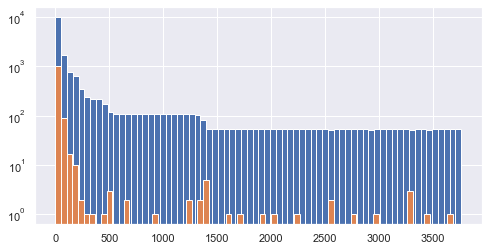

In [18]:
Image('location.png')

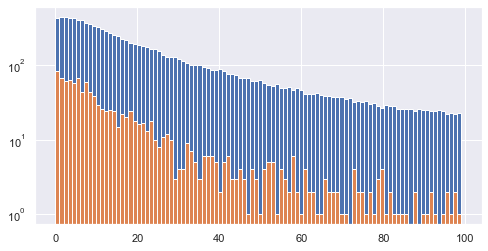

In [17]:
Image('log_location.png')

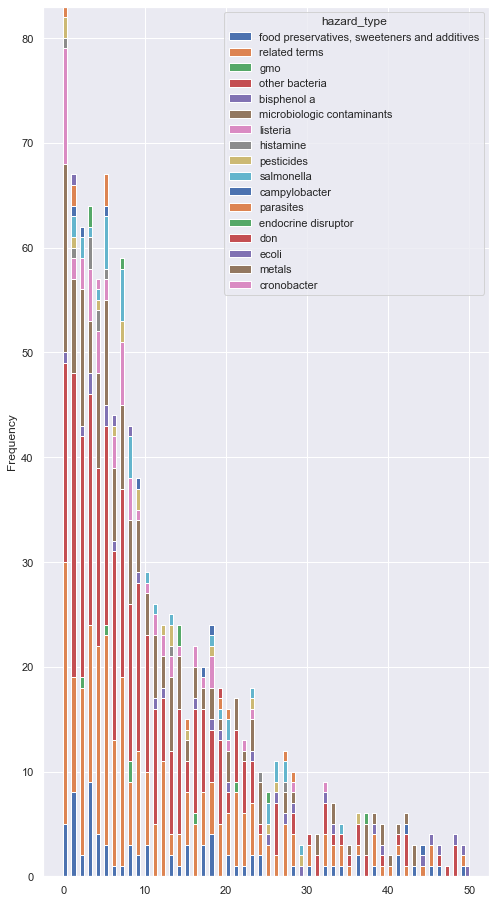

In [19]:
Image('location_3.png')

### Are our Hazard Groupings Good?
In previous meeting the problem of how hazard categories are defined was brought up. This graph is show the co-occurence of terms in the currently-defined groups.


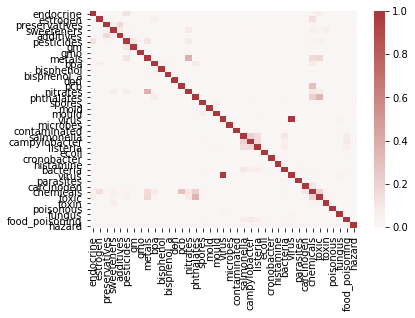

In [21]:
Image('hazard_grouping_corr.png')

The same can be done for our product categories

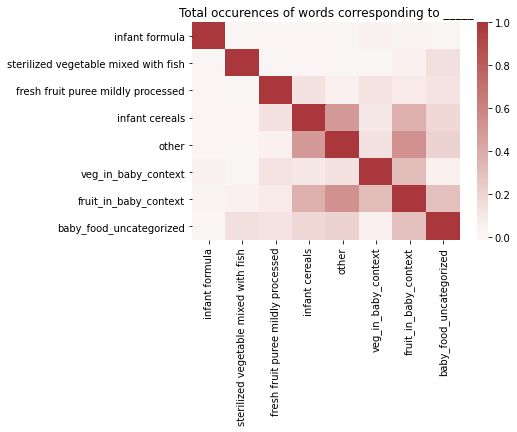

In [22]:
Image('food_corr.png')

### Counting Posts instead of Total Occurences
professor Rallou request that previous visualization focused on number of posts instead of number of occurences
Here is the same visual as in previous meetings, the number of occurences of a hazard, by product category.

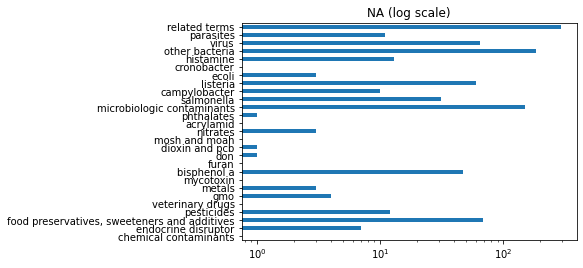

In [23]:
Image('haz_by_prod_postcount/1.png')

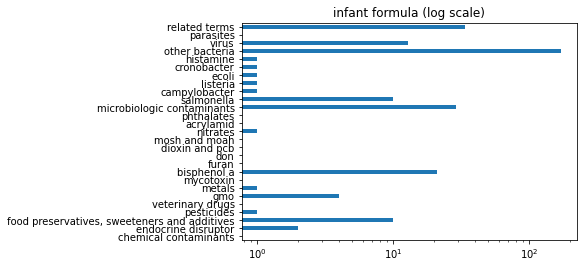

In [25]:
Image('haz_by_prod_postcount/2.png')

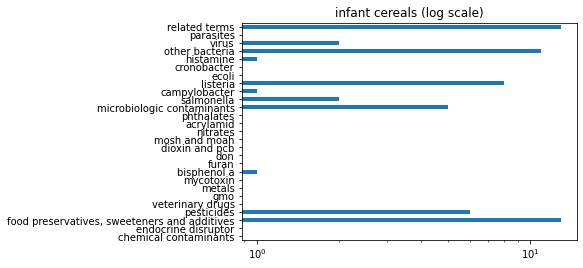

In [26]:
Image('haz_by_prod_postcount/3.png')

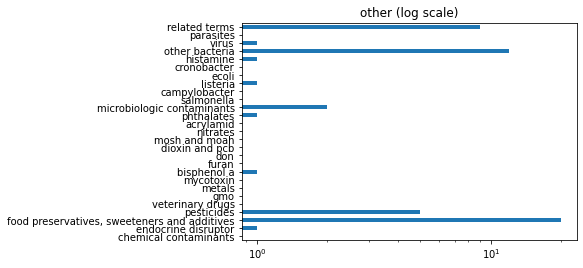

In [28]:
Image('haz_by_prod_postcount/4.png')

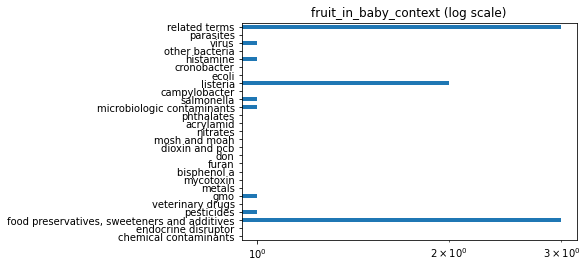

In [29]:
Image('haz_by_prod_postcount/5.png')

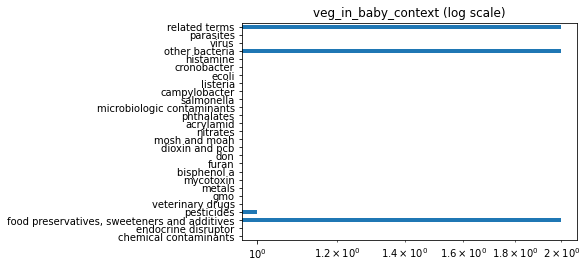

In [30]:
Image('haz_by_prod_postcount/6.png')

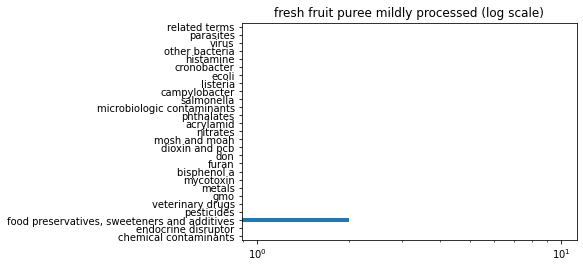

In [31]:
Image('haz_by_prod_postcount/7.png')